In [1]:
#!pip install pandas --user
#!pip install numpy --user
#!pip install matplotlib --user
#!pip install seaborn --user
#!pip install scikit0-learn --user
#!pip install scikit-learn --user

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

In [227]:
df = pd.read_csv('data.csv', delimiter = ',')

In [228]:
df = df.drop(columns='id')
df = df.drop(columns='Unnamed: 32')
print(df.columns)
df.shape

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


(569, 31)

In [229]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

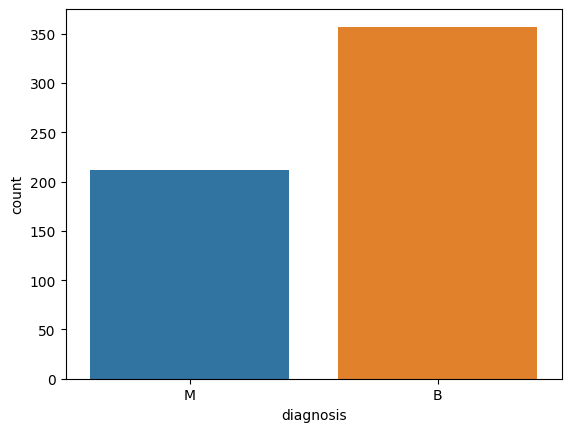

In [230]:
classData = df['diagnosis']
#averageRadius = df['radius_mean']
sb.countplot(x = classData)#, y = df.diagnosis.value_counts(), x = 
#

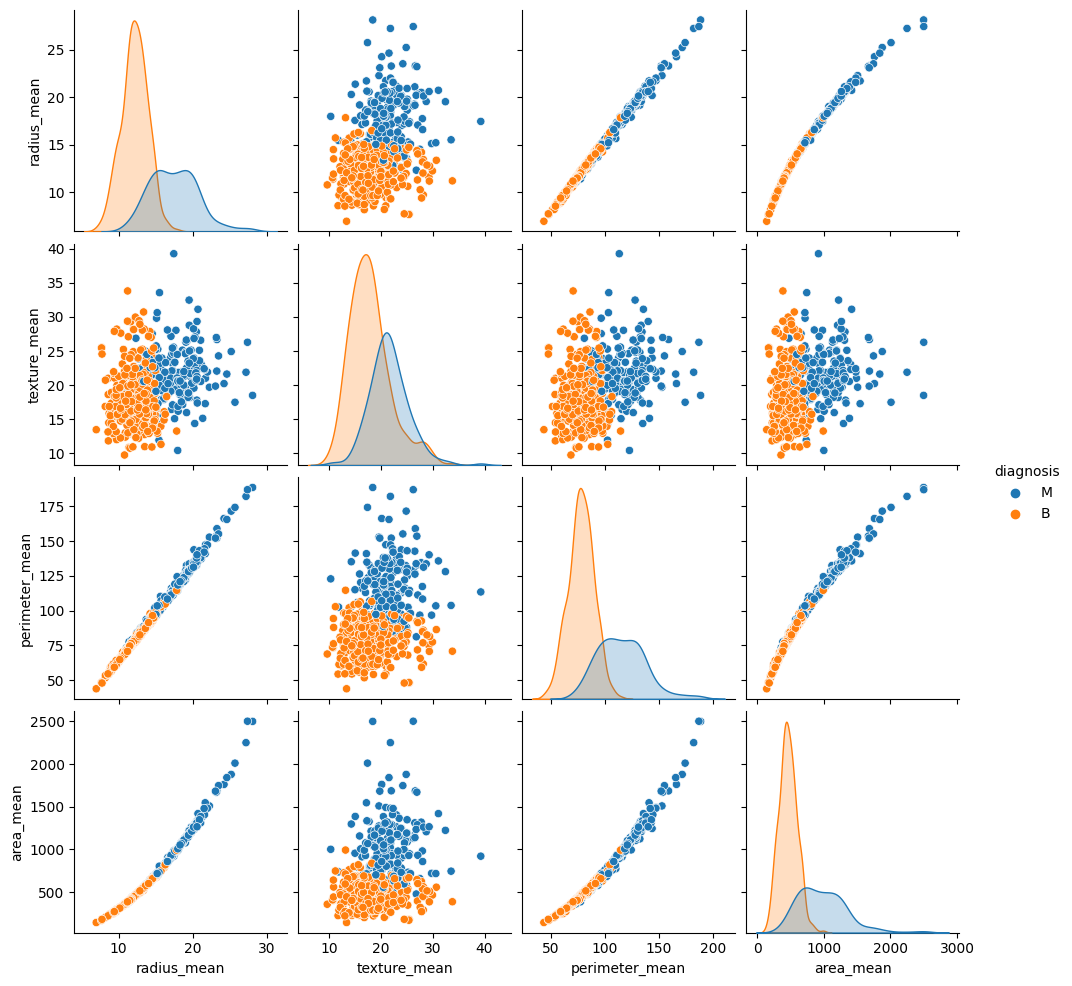

In [231]:
sb.pairplot(df.iloc[:, 0:5], hue = 'diagnosis')

In [232]:
#Area, perimeter, Radius, Texture of Benign is greater than malign

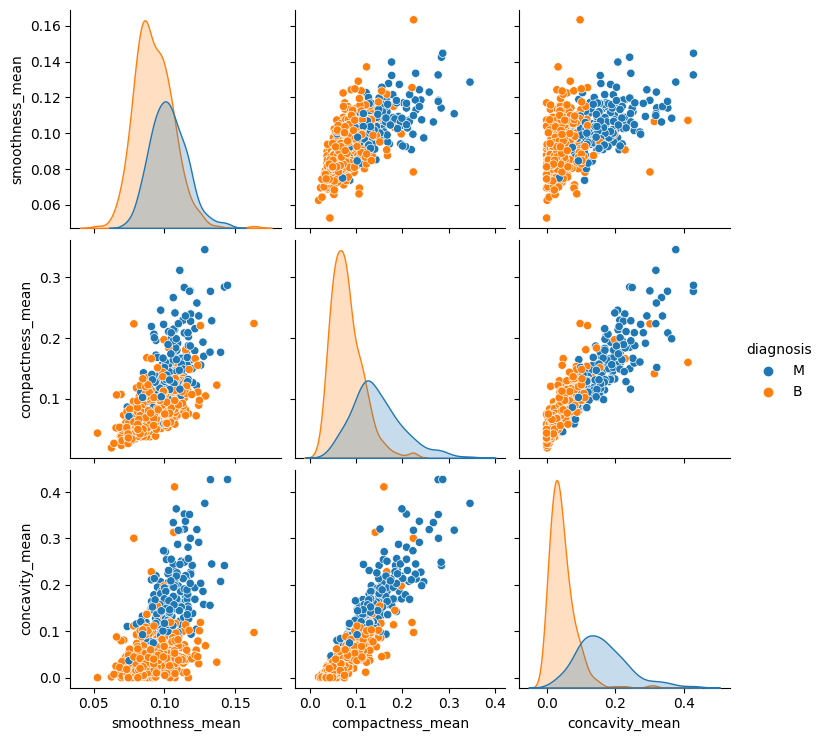

In [233]:
sb.pairplot(df.iloc[:, [0, 5, 6, 7]], hue = 'diagnosis')
#sb.pairplot(df.iloc[:, []], hue = 'diagnosis')

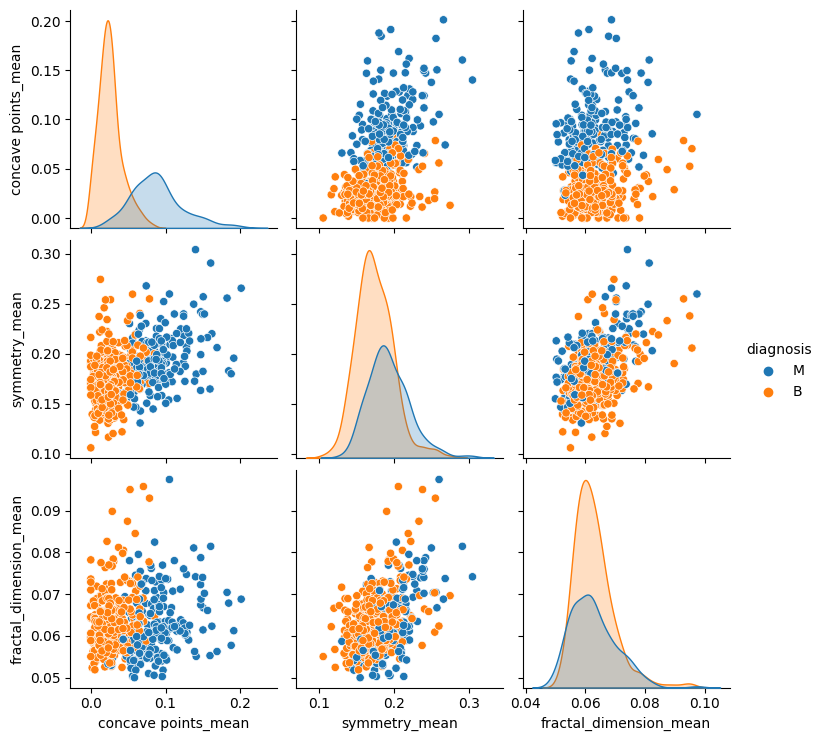

In [234]:
sb.pairplot(df.iloc[:, [0, 8, 9, 10]], hue = 'diagnosis')

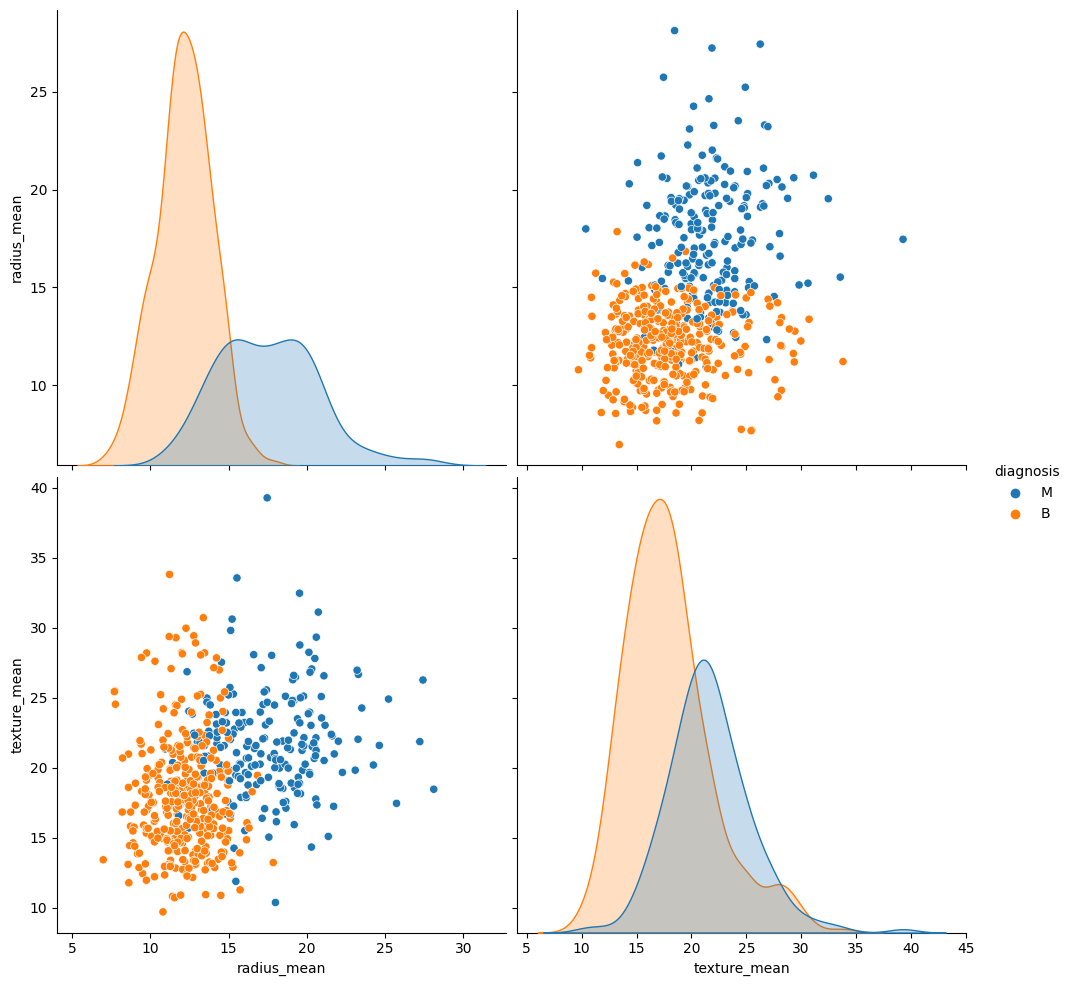

In [235]:
sb.pairplot(df.loc[:,['radius_mean','texture_mean', 'diagnosis']], hue = "diagnosis", height = 5)

In [236]:
from sklearn.cluster import SpectralClustering
from sklearn import preprocessing
specClusObj = SpectralClustering(n_clusters=2,  
                          gamma=0.01, 
                          affinity='rbf', 
                          eigen_tol=0.0, 
                          assign_labels='kmeans', 
                          degree=3, 
                          coef0=1, 
                          kernel_params=None, 
                          n_jobs=1)

In [237]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(df.iloc[:,1:30]))
datas.columns = list(df.iloc[:,1:30].columns)
datas['diagnosis'] = df['diagnosis']
# Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values
kY = specClusObj.fit_predict(X)
sepColumn = specClusObj.fit_predict(X)

In [238]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.494308
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.117722
[t-SNE] KL divergence after 2250 iterations: 0.865708


Text(0.5, 1.0, 'Spectral clustering plot')

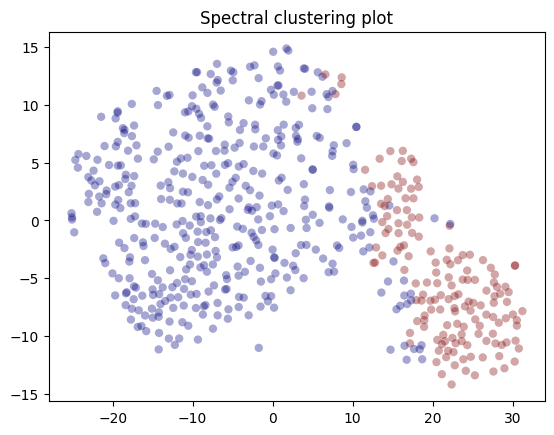

In [239]:
f, axes = plt.subplots(1, sharey=True)

axes.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
axes.set_title('Spectral clustering plot')

In [240]:
from sklearn.metrics import silhouette_samples
df_clustering = df[['diagnosis', 'texture_mean']]
dataForSil = df_clustering.iloc[:, :].values
dataForSil

array([[ 1.  , 10.38],
       [ 1.  , 17.77],
       [ 1.  , 21.25],
       ...,
       [ 1.  , 28.08],
       [ 1.  , 29.33],
       [ 0.  , 24.54]])

In [241]:
from sklearn.cluster import KMeans
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(dataForSil)
silhouette_score(dataForSil, kmeans.labels_)

0.4536934803444624

from sklearn.cluster import KMeans
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
               max_iter = 300, n_init = 10,
               random_state = 42)
    kmeans.fit(dataForSil)

In [259]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans_per = [KMeans(n_clusters = k, random_state = k+42).fit(dataForSil) for k in range(1, 10)]

silhouette_scores = [silhouette_score(dataForSil, model.labels_) for model in kmeans_per[1:]]
silhouette_scores

C:\Users\EndUser\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\EndUser\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\EndUser\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\EndUser\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

[0.5477813810481228,
 0.5247382243856284,
 0.507530493888314,
 0.4925808904727617,
 0.4800752081082097,
 0.4861401624555292,
 0.4694393508399997,
 0.45572842582849293]

In [266]:
from sklearn.metrics import normalized_mutual_info_score
specPER = [SpectralClustering(n_clusters = k, random_state = 42).fit(dataForSil) for k in range(1, 10)]
#print(specPER)
NMIScores = [normalized_mutual_info_score(labels_pred = model.labels_, labels_true = df.diagnosis) for model in specPER[1:]]
#for i in range(1, 3):
#    kmns = SpectralClustering(n_clusters=2,  gamma=(i/2)*3, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=i+2, kernel_params=None, n_jobs=1)
#    new = kmns.fit_predict(X)
#    normalized_mutual_info_score(labels_true = new, labels_pred = df.diagnosis)

[SpectralClustering(n_clusters=1, random_state=42), SpectralClustering(n_clusters=2, random_state=42), SpectralClustering(n_clusters=3, random_state=42), SpectralClustering(n_clusters=4, random_state=42), SpectralClustering(n_clusters=5, random_state=42), SpectralClustering(n_clusters=6, random_state=42), SpectralClustering(n_clusters=7, random_state=42), SpectralClustering(random_state=42), SpectralClustering(n_clusters=9, random_state=42)]


In [261]:
NMIScores

[0.015791828234171173,
 0.14875685665575744,
 0.10638587540529101,
 0.008828761439386117,
 0.08076364775882743,
 0.046103176766885454,
 0.045826909100687076,
 0.07054031422911249]

In [262]:
l = list(range(1, 9))

<ErrorbarContainer object of 3 artists>

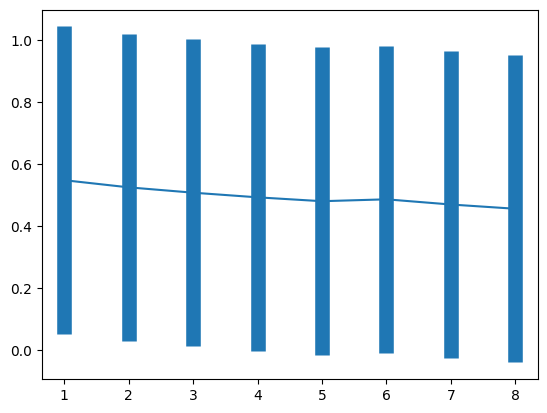

In [264]:
plt.errorbar(x = l, y = silhouette_scores, yerr = sum(silhouette_scores)/len(silhouette_scores)
            , elinewidth = 10.5)

<ErrorbarContainer object of 3 artists>

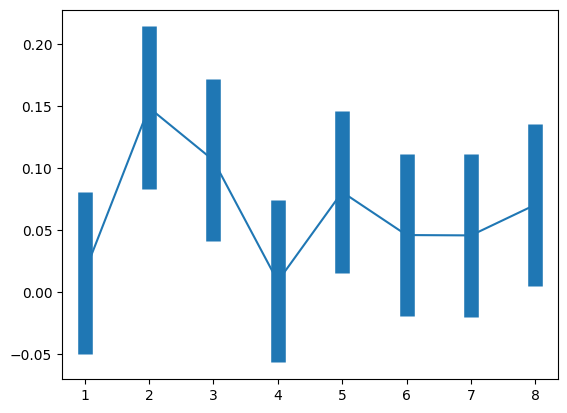

In [265]:
plt.errorbar(x = l, y = NMIScores, yerr = sum(NMIScores)/len(NMIScores)
            , elinewidth = 10.5)